In [1]:
#Importing Libraries

import pandas as pd
#from top2vec import Top2Vec
import nltk
import string
from nltk.util import ngrams
import matplotlib.pyplot as plt
from nltk.stem import * 
from nltk.corpus import stopwords
import numpy as np
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
import seaborn as sns
sns.set()
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
from wordcloud import WordCloud, STOPWORDS

In [102]:
data = pd.read_csv("philosophy_data.csv")
data= data [['school','sentence_str']]
data

,school,sentence_str
0,plato,"What's new, Socrates, to make you leave your ..."
1,plato,Surely you are not prosecuting anyone before t...
2,plato,The Athenians do not call this a prosecution b...
3,plato,What is this you say?
4,plato,"Someone must have indicted you, for you are no..."
...,...,...
19994,analytic,Isn't there a deeper explanation; or mustn't a...
19995,analytic,"Well, have I myself a deeper understanding?"
19996,analytic,Have I got more than I give in the explanation?
19997,analytic,"But then, whence the feeling that I have got m..."


In [64]:
import string
string.punctuation

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#defining function for tokenization
import re
def tokenization(text):
    tokens=nltk.word_tokenize(text)
    return tokens


#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text


from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text


In [67]:
#Calling the  functions to clean the data

data['clean_msg']= data['sentence_str'].apply(lambda x:remove_punctuation(x))
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))
data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))
data['msg_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))

In [80]:
dictionary = Dictionary(data['msg_lemmatized'])
#print(dictionary.token2id)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in data['msg_lemmatized']]

In [81]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 2, passes=10)

In [93]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

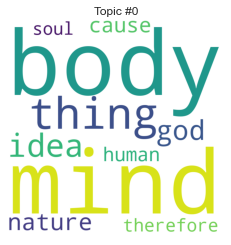

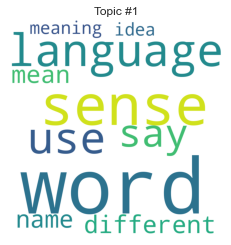

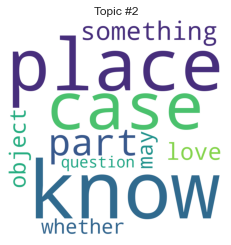

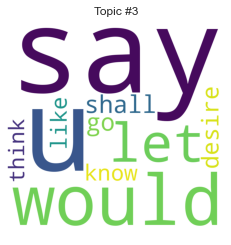

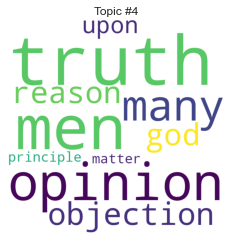

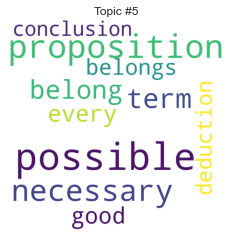

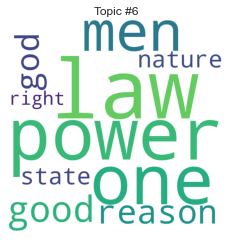

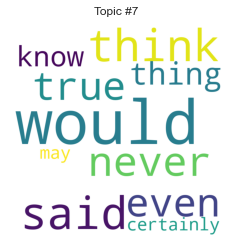

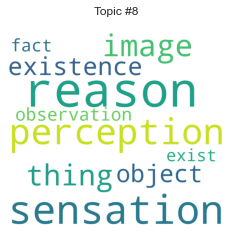

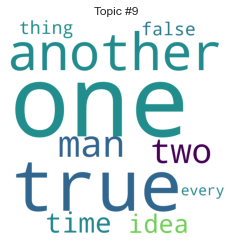

In [107]:
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, max_words =10).fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [95]:
lda_model.print_topics(-1)

[(0,
  '0.046*"body" + 0.044*"mind" + 0.041*"thing" + 0.038*"idea" + 0.035*"god" + 0.025*"nature" + 0.020*"cause" + 0.016*"human" + 0.014*"therefore" + 0.013*"soul"'),
 (1,
  '0.061*"word" + 0.029*"sense" + 0.023*"language" + 0.021*"use" + 0.017*"say" + 0.016*"different" + 0.016*"mean" + 0.016*"name" + 0.015*"meaning" + 0.015*"idea"'),
 (2,
  '0.037*"know" + 0.032*"place" + 0.027*"case" + 0.023*"part" + 0.021*"something" + 0.018*"love" + 0.016*"object" + 0.015*"may" + 0.014*"whether" + 0.013*"question"'),
 (3,
  '0.056*"say" + 0.053*"u" + 0.022*"would" + 0.017*"let" + 0.016*"shall" + 0.015*"go" + 0.014*"desire" + 0.013*"know" + 0.013*"like" + 0.012*"think"'),
 (4,
  '0.022*"truth" + 0.017*"men" + 0.015*"opinion" + 0.014*"many" + 0.012*"objection" + 0.012*"god" + 0.012*"reason" + 0.011*"upon" + 0.011*"principle" + 0.011*"matter"'),
 (5,
  '0.060*"possible" + 0.056*"proposition" + 0.047*"necessary" + 0.038*"term" + 0.034*"belong" + 0.027*"every" + 0.025*"good" + 0.023*"belongs" + 0.023*"

In [1]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

NameError: name 'pyLDAvis' is not defined

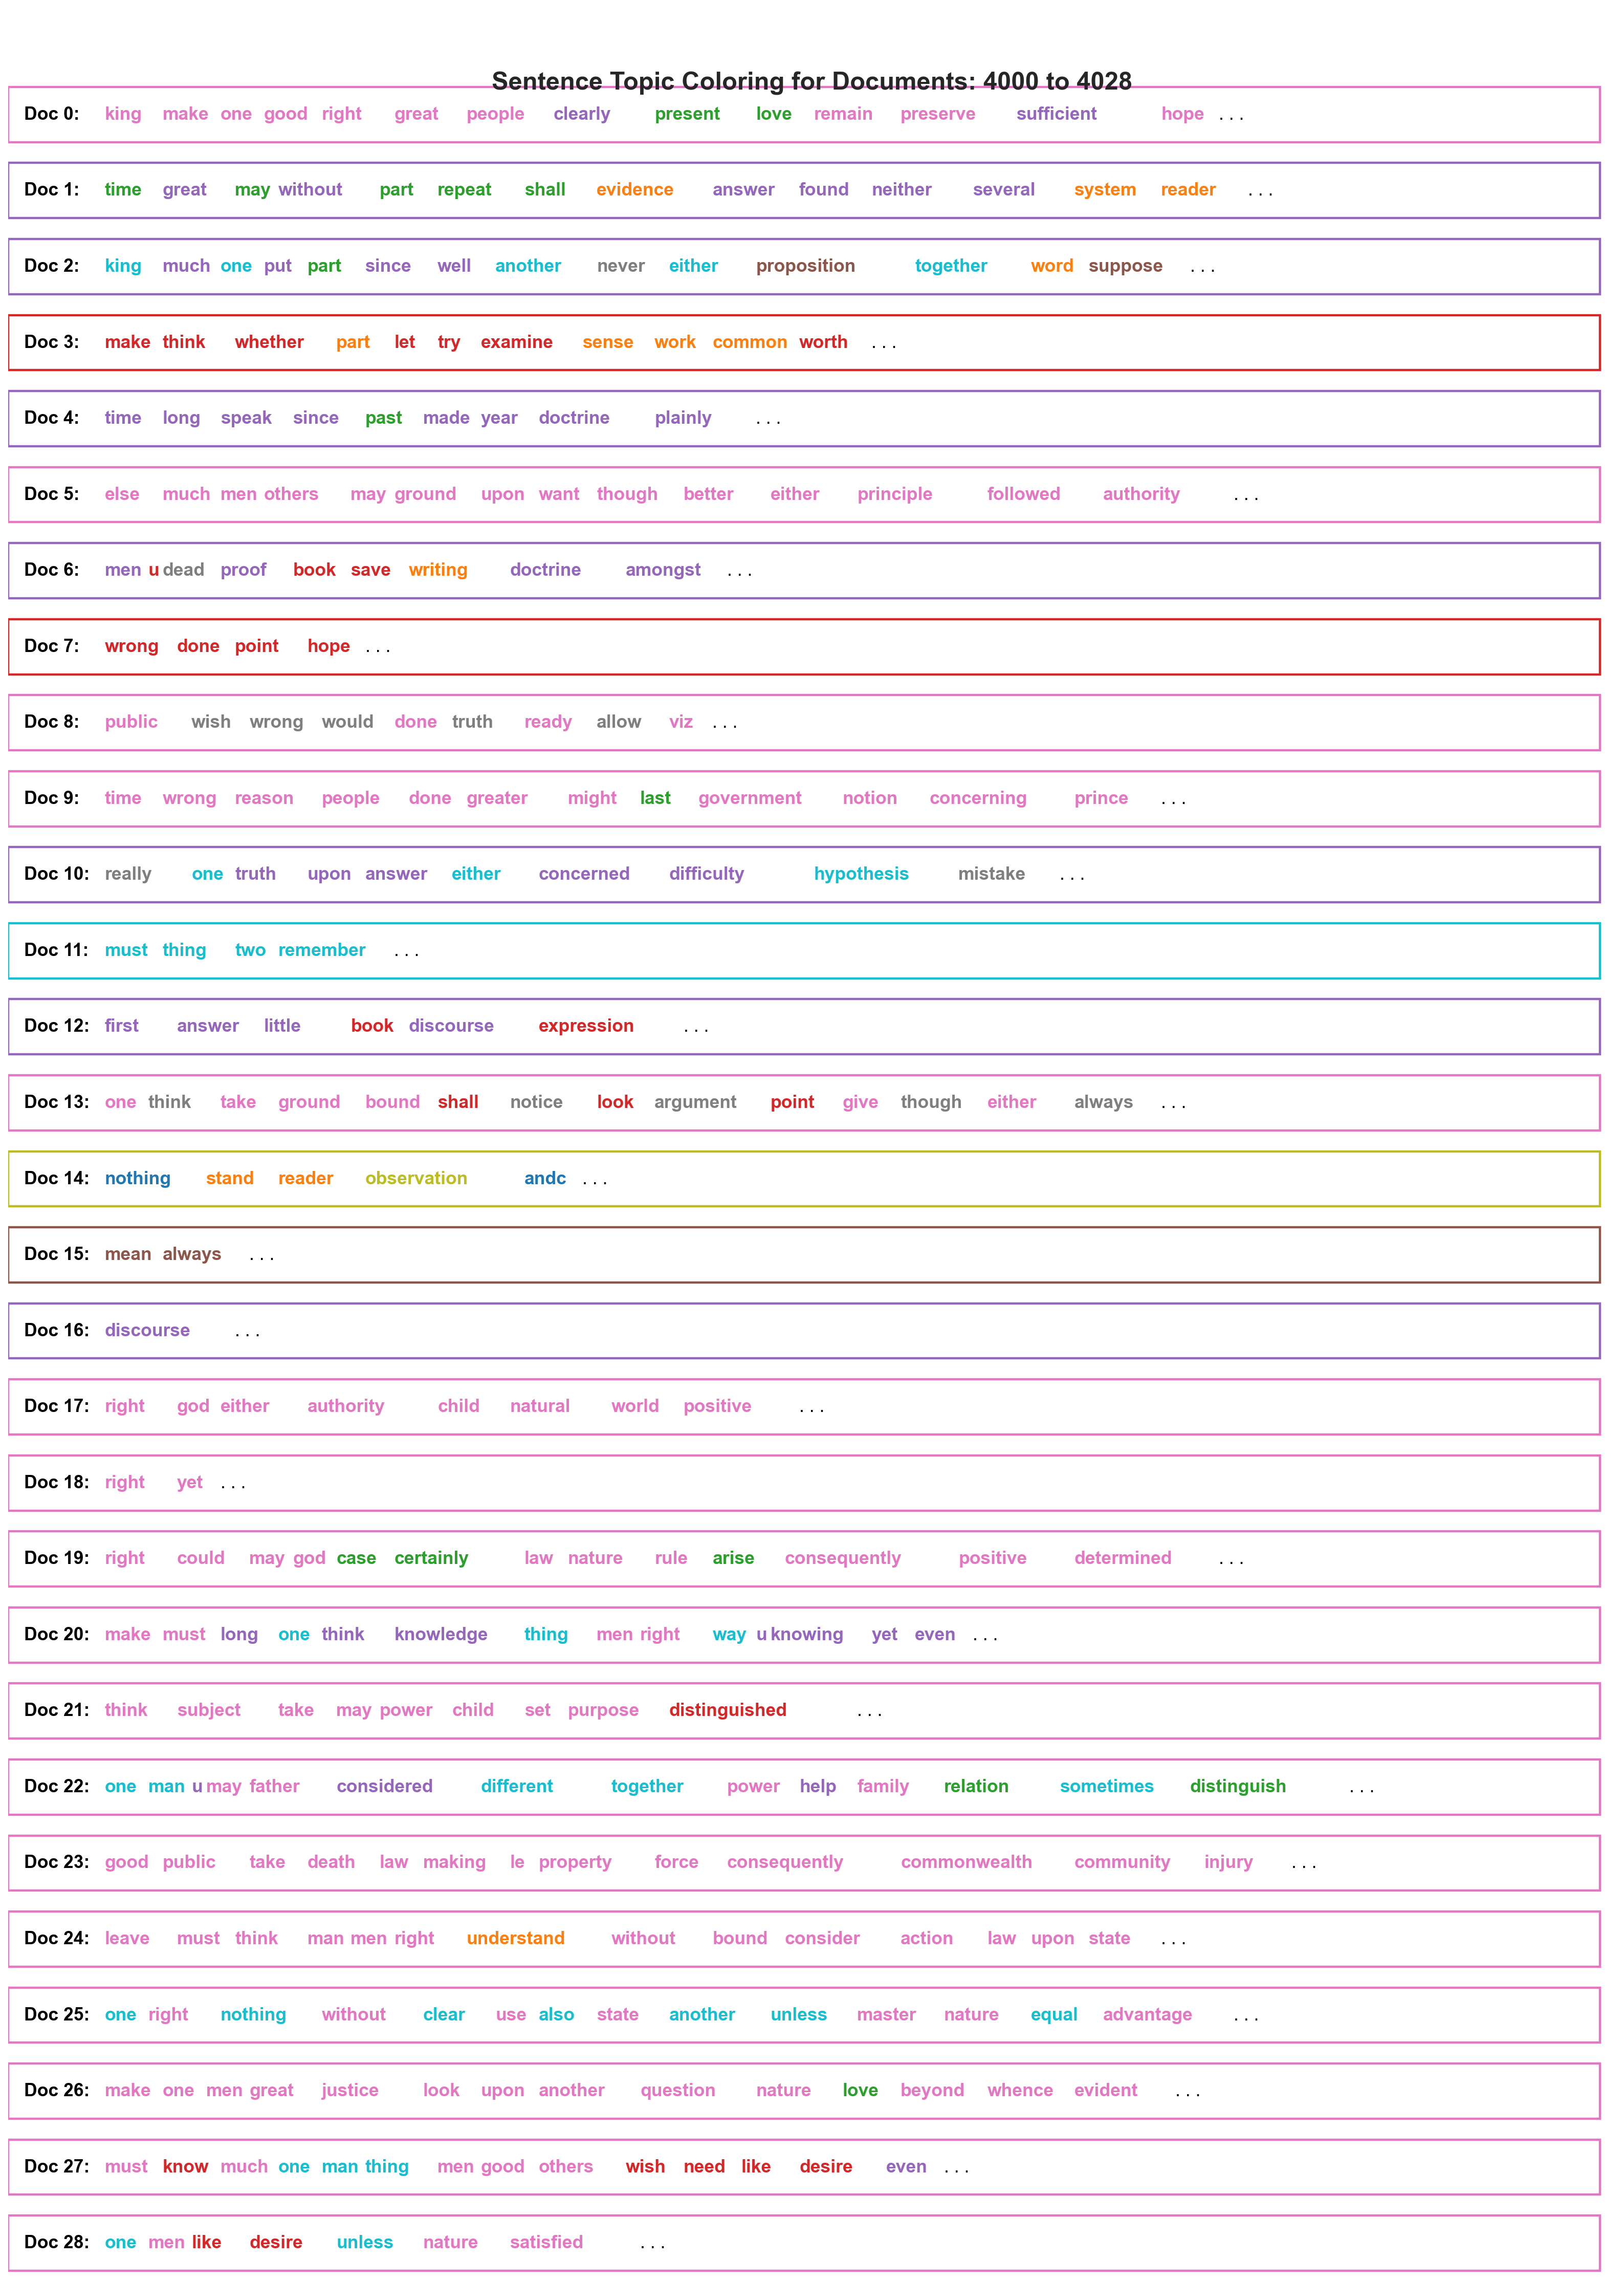

In [114]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 4000, end = 4030):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model.get_document_topics(corp_cur, per_word_topics = True)
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    